In [1]:
import torch
import matplotlib.pylab as plt


In [2]:
#미분
x = torch.tensor(2.0,requires_grad = True)
print("The tensor x: ", x)

The tensor x:  tensor(2., requires_grad=True)


In [3]:
y = x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [4]:
y.backward()
print(x.grad)

tensor(4.)


In [5]:
print('data', x.data)
print('grad_fn:',x.grad_fn)
print("grad: ",x.grad)
print("is_leaf: ", x.is_leaf)
print("requires_grad: ", x.requires_grad)

data tensor(2.)
grad_fn: None
grad:  tensor(4.)
is_leaf:  True
requires_grad:  True


In [6]:
print('data: ',y.data)
print('grad_fn: ',y.grad_fn)
print('grad:', y.grad)
print("is_leaf: ",y.is_leaf)
print("requires_grad: ",y.requires_grad)

data:  tensor(4.)
grad_fn:  <PowBackward0 object at 0x000002A6C982C348>
grad: None
is_leaf:  False
requires_grad:  True


C:\Users\pc\anaconda3\envs\Pytorch_Study\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#Calculate the derivative of y = 2x^3 + x at x = 1
x = torch.tensor(1.0,requires_grad=True)
y = 2*x**3 + x
y.backward()
x.grad

tensor(7.)

In [12]:
class SQ(torch.autograd.Function):
    @staticmethod
    def forward(ctx,i):
        result =i**2
        ctx.save_for_backward(i)
        return result
    
    @staticmethod
    def backward(ctx, grad_output):
        i,  = ctx.saved_tensors
        grad_ouput = 2*i
        return grad_output

In [14]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad


tensor(1.)

In [15]:
y


tensor(4., grad_fn=<SQBackward>)

In [16]:
y.grad_fn


In [17]:
x.grad()

TypeError: 'Tensor' object is not callable

In [18]:
x.grad

tensor(1.)

In [19]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to thye input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [20]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

In [21]:
x.grad

tensor(4.)

In [22]:
#Calculate Partial Derivatives

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v+ u**2
f

tensor(3., grad_fn=<AddBackward0>)

In [23]:
f.backward()

In [24]:
u.grad

tensor(4.)

In [25]:
v.grad


tensor(1.)

In [26]:
x = torch.linspace(-10,10,10,requires_grad=True)
Y = x**2
y = torch.sum(x**2)

In [27]:
y.backward()


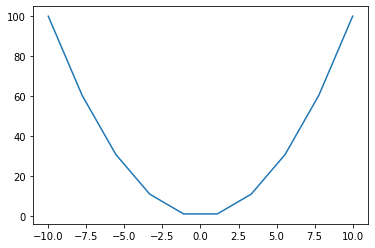

In [28]:
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'funtion')

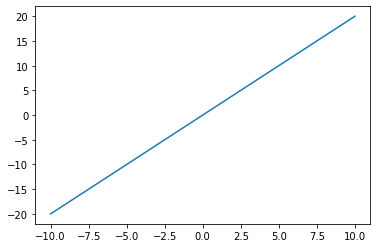

In [29]:
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')

Text(0.5, 0, 'x')

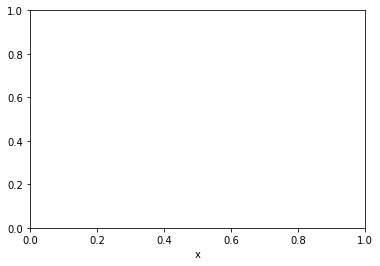

In [30]:
plt.xlabel('x')

No handles with labels found to put in legend.


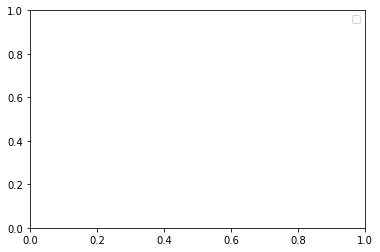

In [31]:
plt.legend()

In [32]:
y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

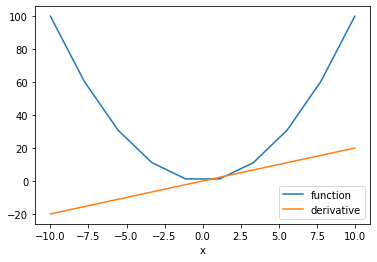

In [33]:
x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

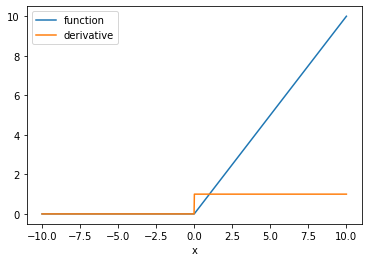

In [34]:
x = torch.linspace(-10,10,10, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

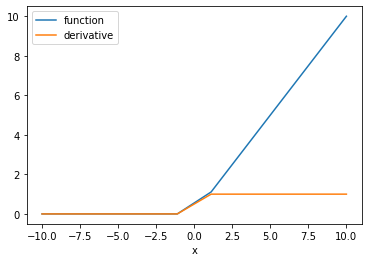

In [35]:
x = torch.linspace(-10,10,10, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [36]:
y.grad_fn

In [37]:
u = torch.tensor(2.0, requires_grad = True)
v = torch.tensor(1.0, requires_grad = True)
f = u*v + (u*v)**2
f.backward()
u.grad

tensor(5.)